In [43]:
from openparse import DocumentParser, Pdf
from pprint import pprint
import re
import os

ELEMENT_DELIMETER = "<br><br>"
NEWLINE = "  \n"
DOUBLE_NEWLINE = "\n\n"

pdf_path = "../docs/abc.pdf"


parser = DocumentParser(
    table_args={
        "parsing_algorithm": "pymupdf",
        "table_output_format": "markdown",
    },
)

parsed_pdf = parser.parse(pdf_path)
# pprint(parsed_pdf)

In [44]:
pdf_dict = parsed_pdf.model_dump()
# pprint(pdf_dict)

In [45]:
def remove_spaces_and_newlines(text: str) -> str:
    # 使用正则表达式去掉汉字与汉字之间的空格和换行符
    text = re.sub(r"(?<=[\u4e00-\u9fff])\s+(?=[\u4e00-\u9fff])", "", text)
    # 使用正则表达式去掉英文与英文之间的空格和换行符
    text = re.sub(r"(?<=[a-zA-Z])\s+(?=[a-zA-Z])", "", text)
    # 使用正则表达式去掉汉字与英文之间的空格和换行符
    text = re.sub(r"(?<=[\u4e00-\u9fff])\s+(?=[a-zA-Z])", "", text)
    # 使用正则表达式去掉英文与汉字之间的空格和换行符
    text = re.sub(r"(?<=[a-zA-Z])\s+(?=[\u4e00-\u9fff])", "", text)
    return text

In [46]:
def write_text_to_markdown(data, output_file):
    formatted_text = ""
    for item in data:
        text = item["text"].replace("\n", NEWLINE).replace(ELEMENT_DELIMETER, NEWLINE)
        if "table" in item["variant"]:
            text = remove_spaces_and_newlines(text)

        if formatted_text == "":
            formatted_text = text
        else:
            formatted_text = formatted_text + DOUBLE_NEWLINE + text
    with open(output_file, "w", encoding="utf-8") as f:
        f.write(formatted_text)


output_file = "output_markdown/document.md"
os.makedirs(os.path.dirname(output_file), exist_ok=True)
write_text_to_markdown(pdf_dict["nodes"], output_file)

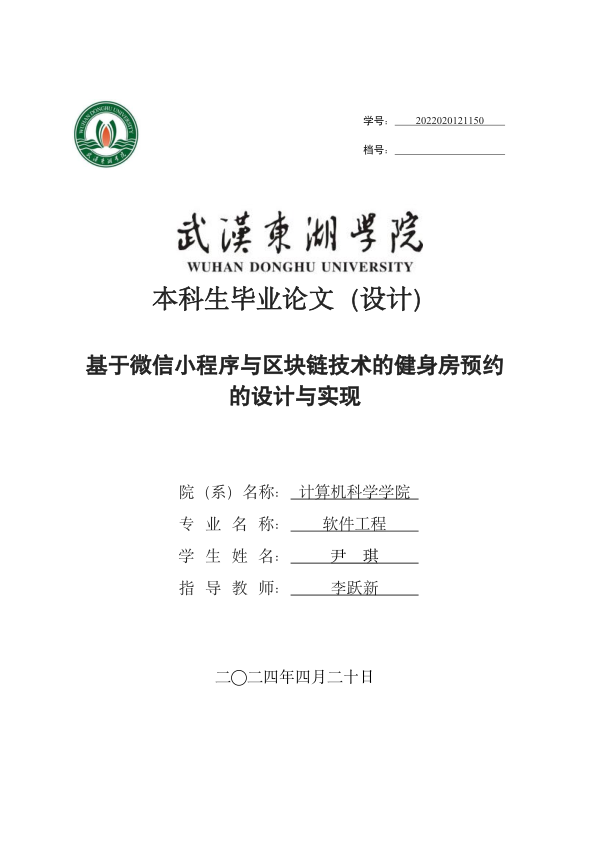

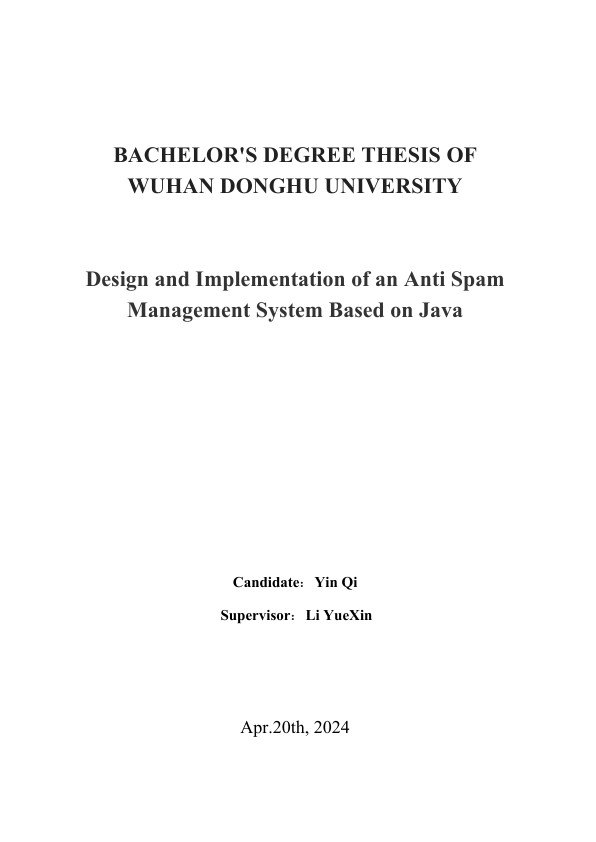

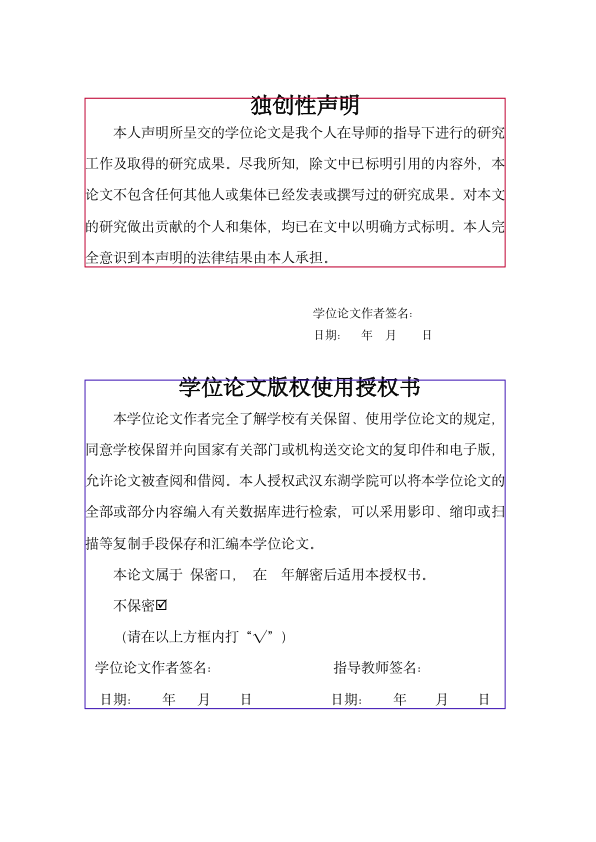

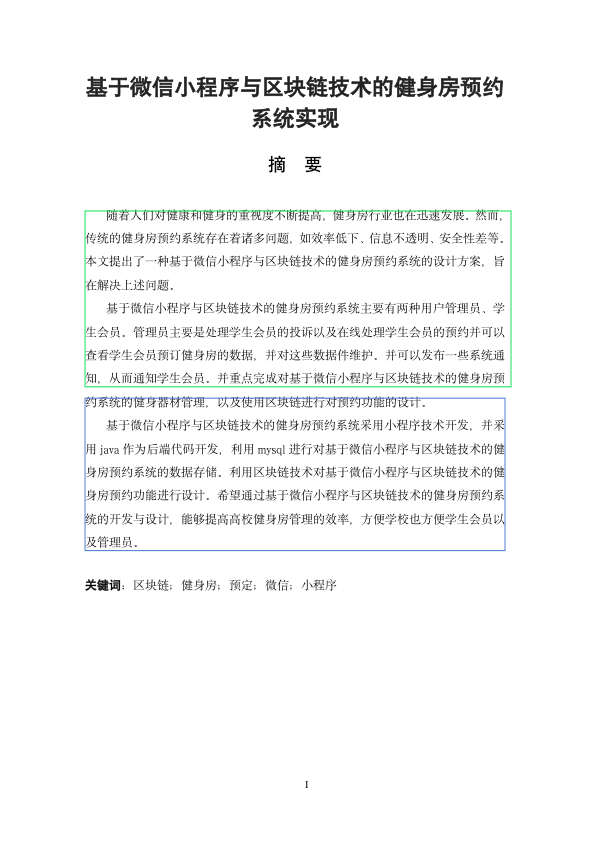

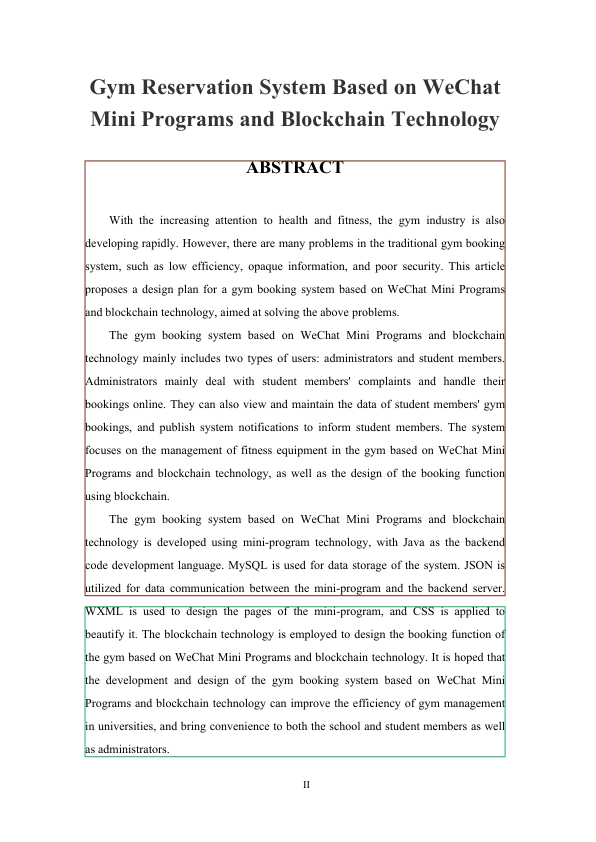

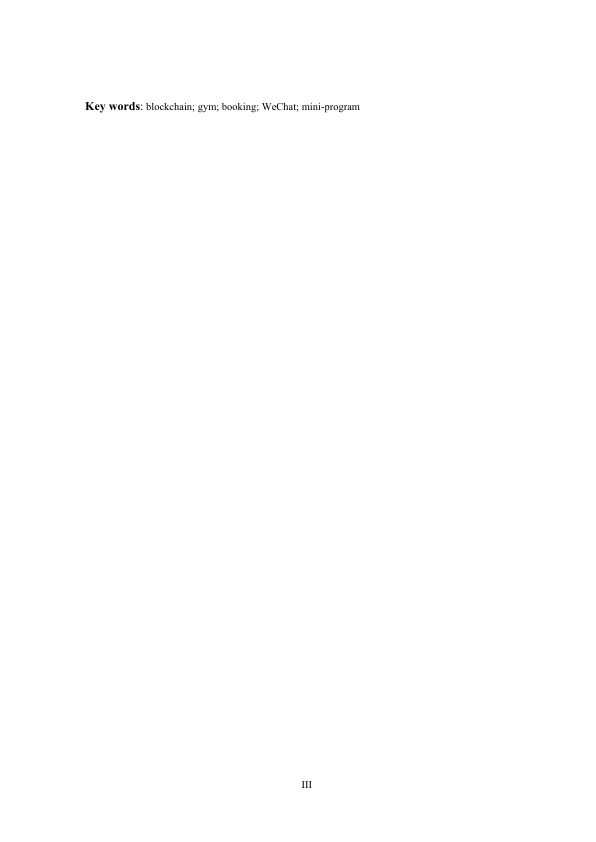

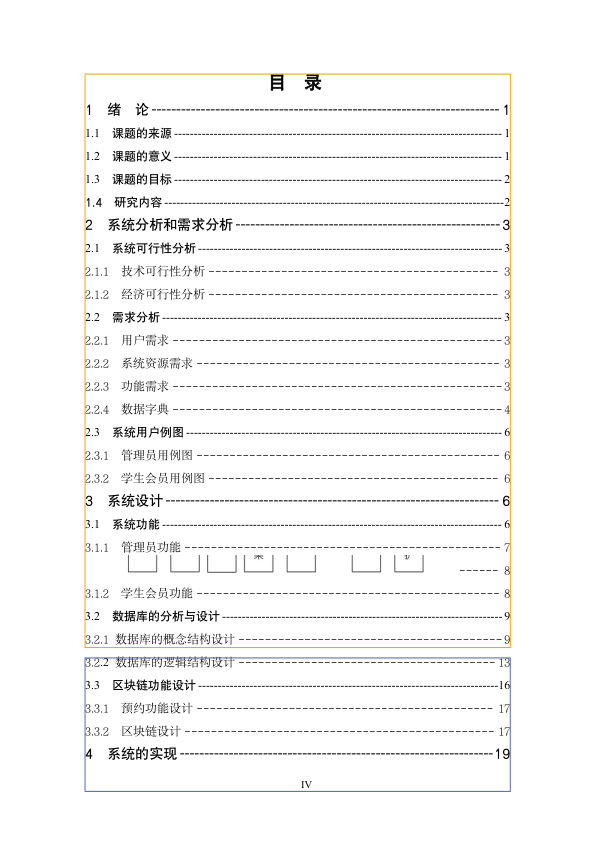

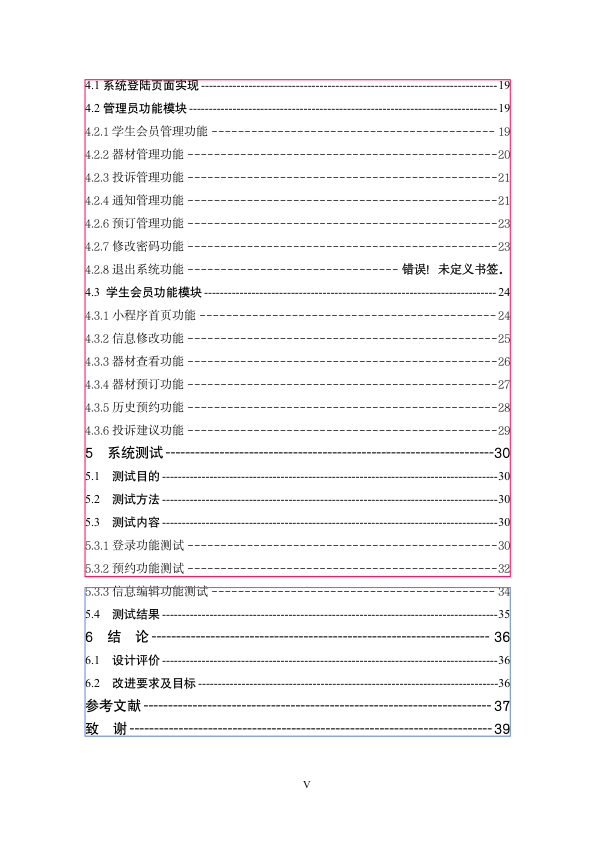

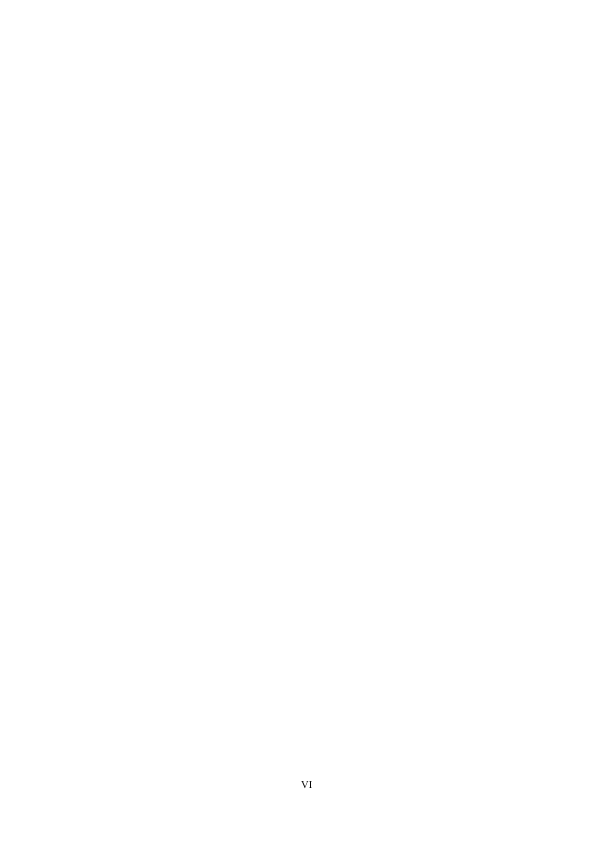

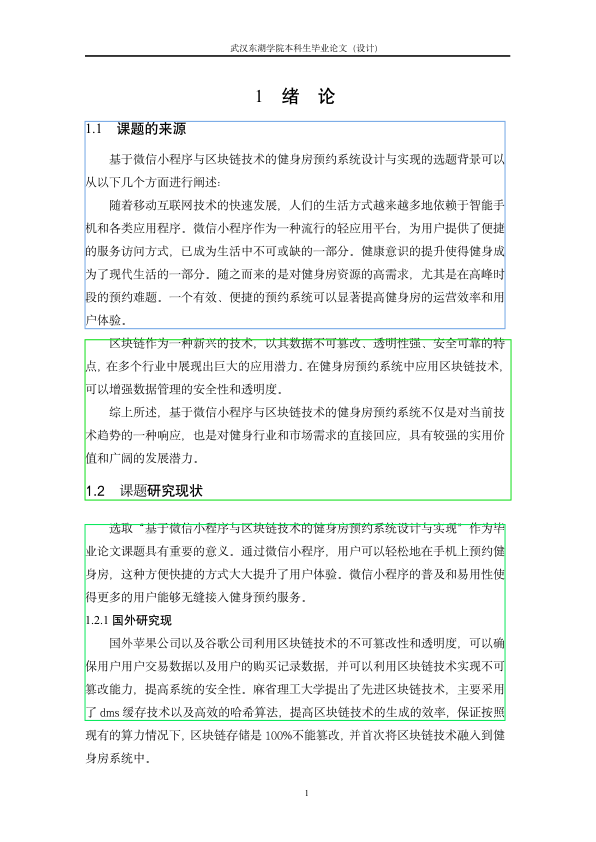

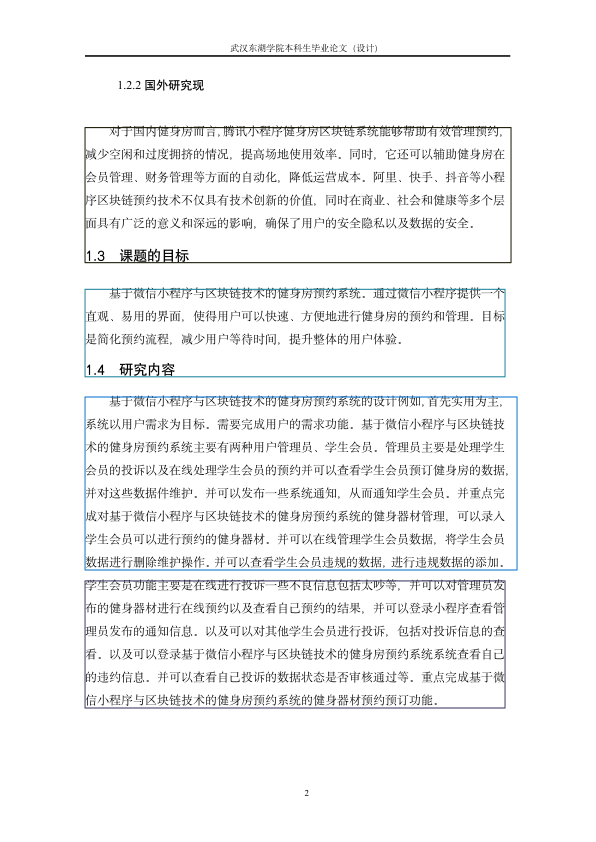

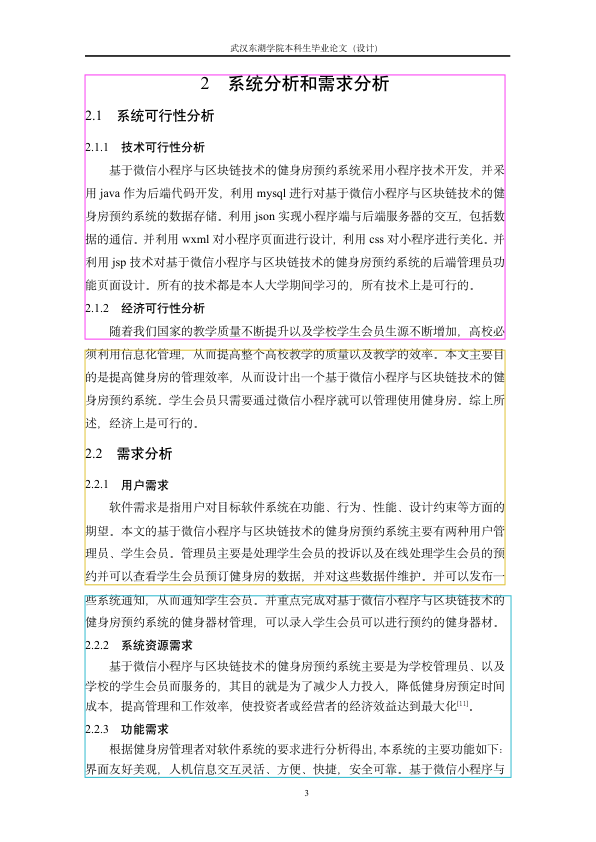

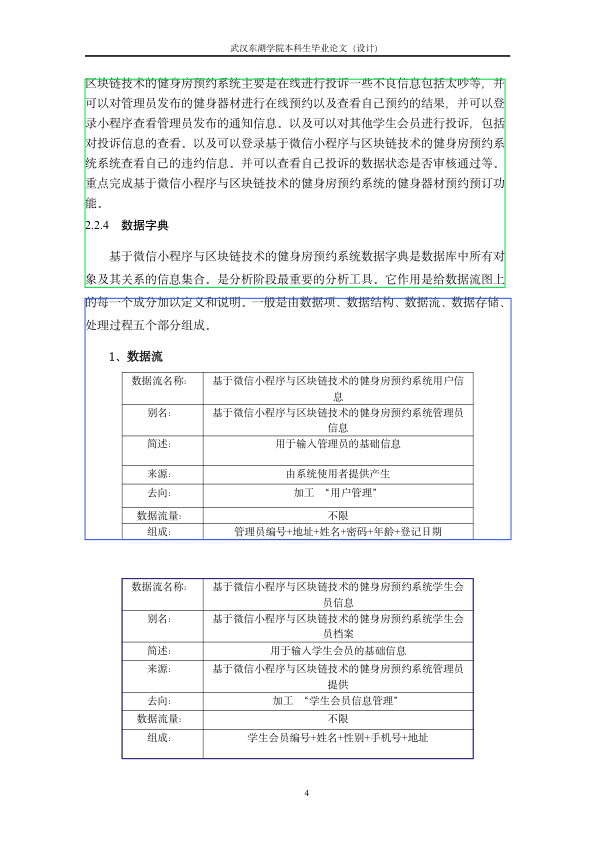

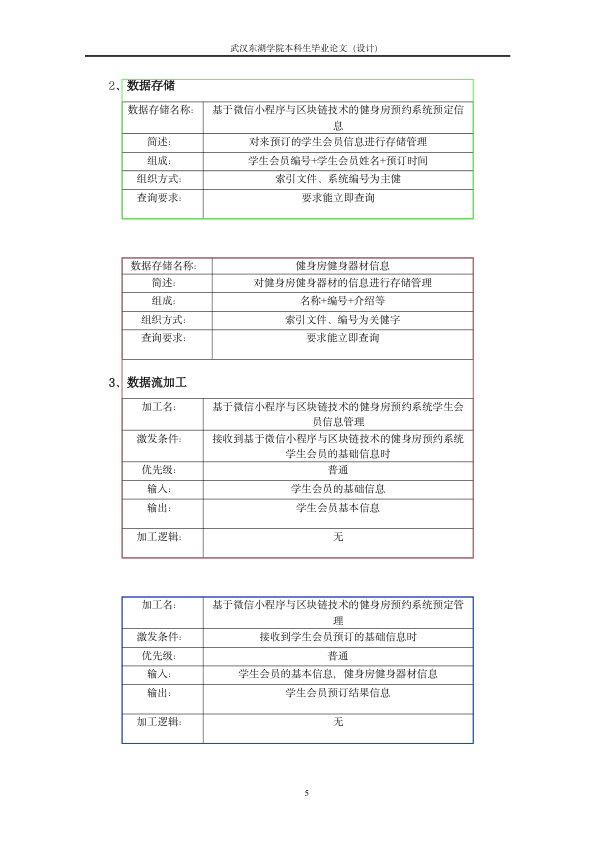

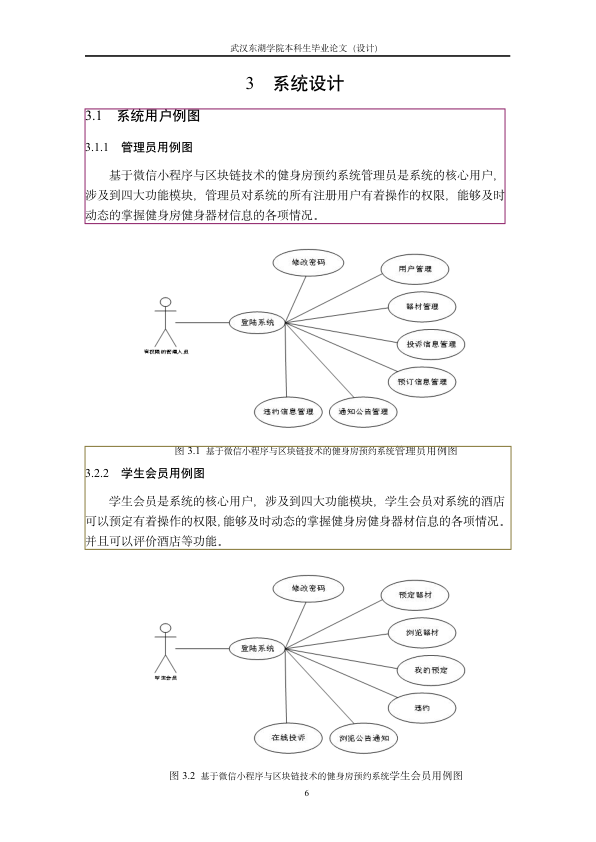

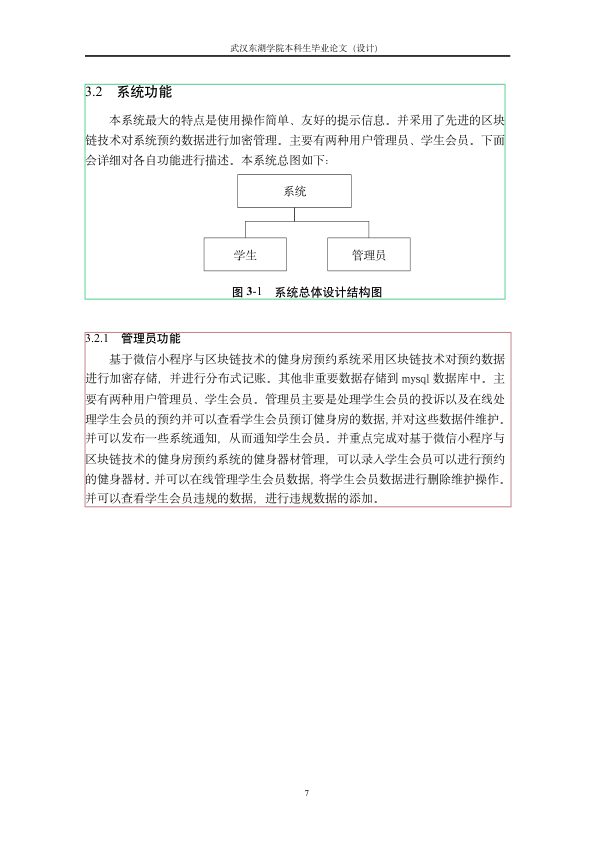

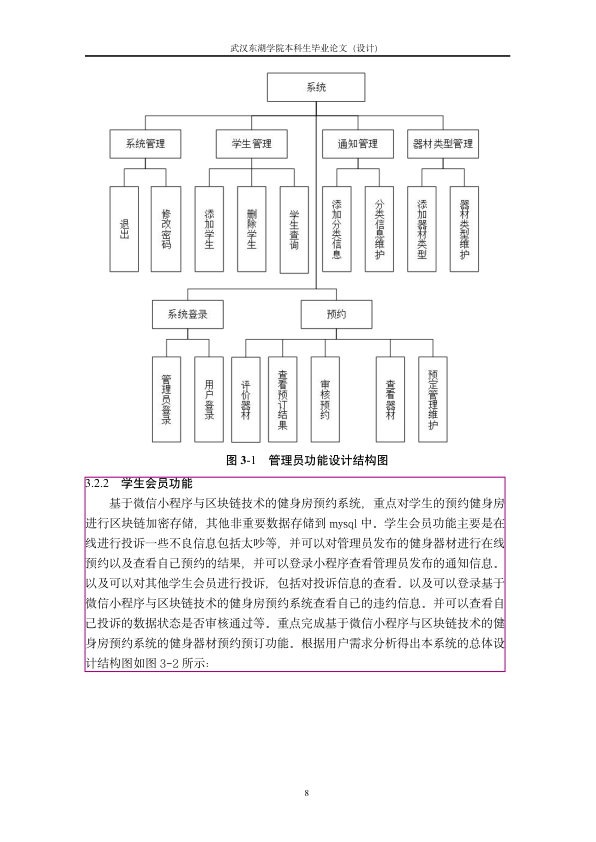

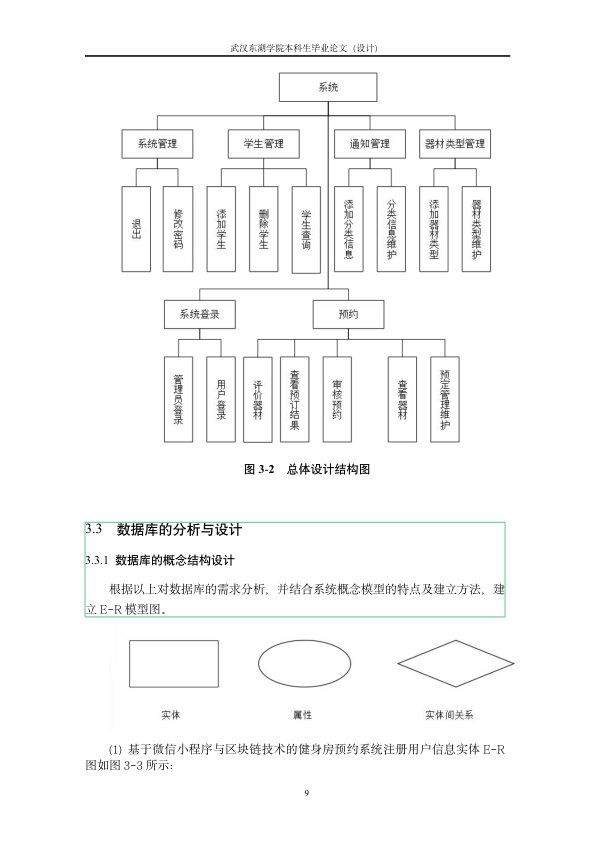

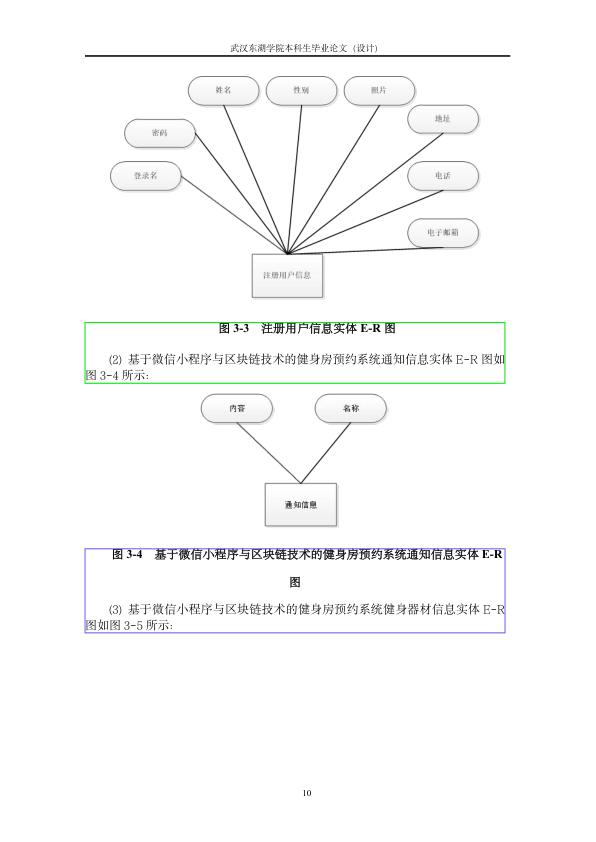

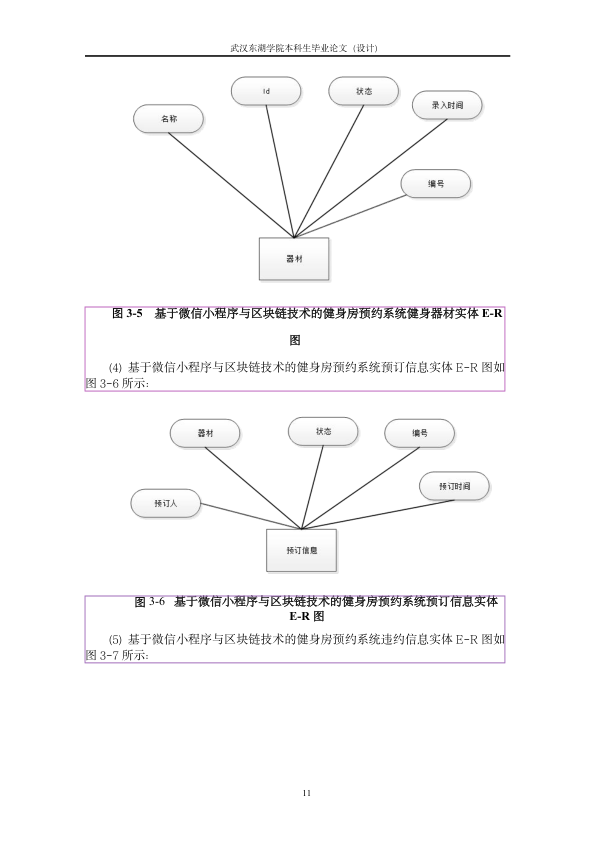

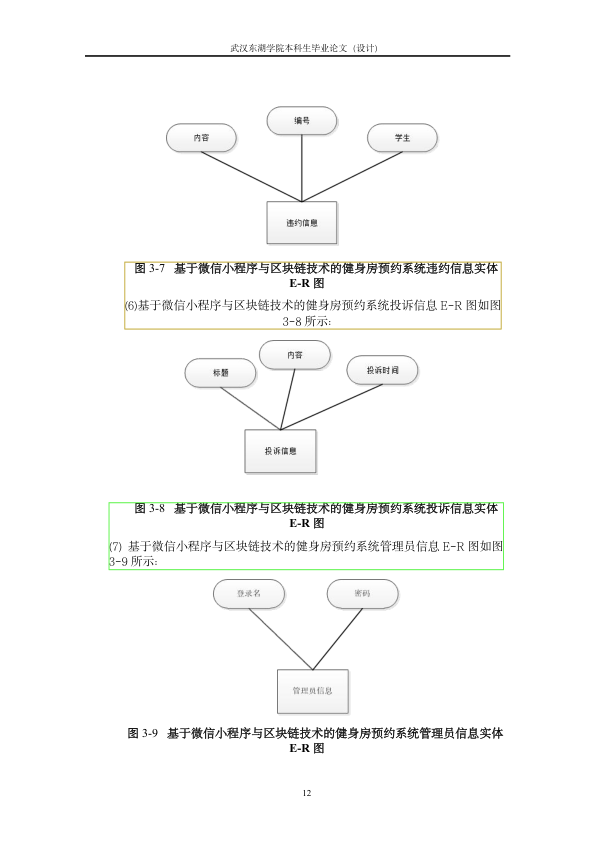

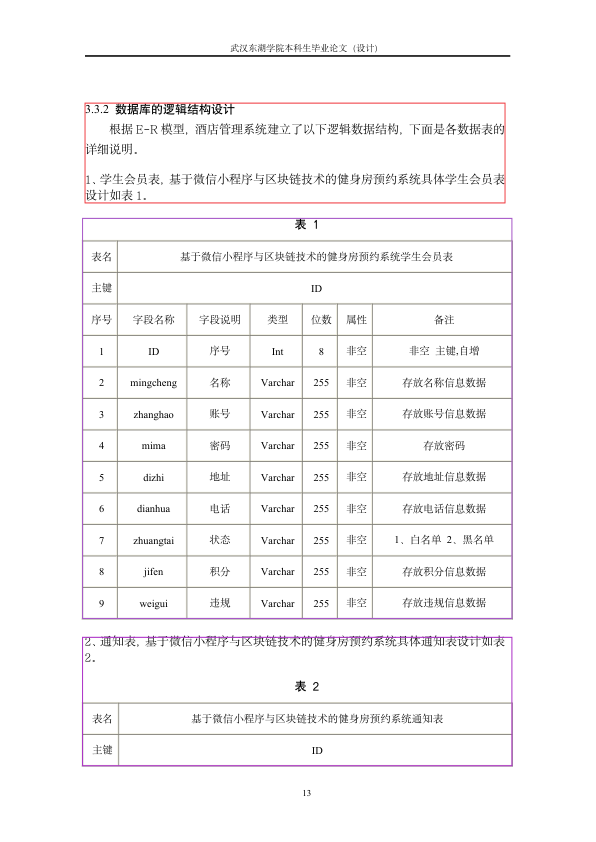

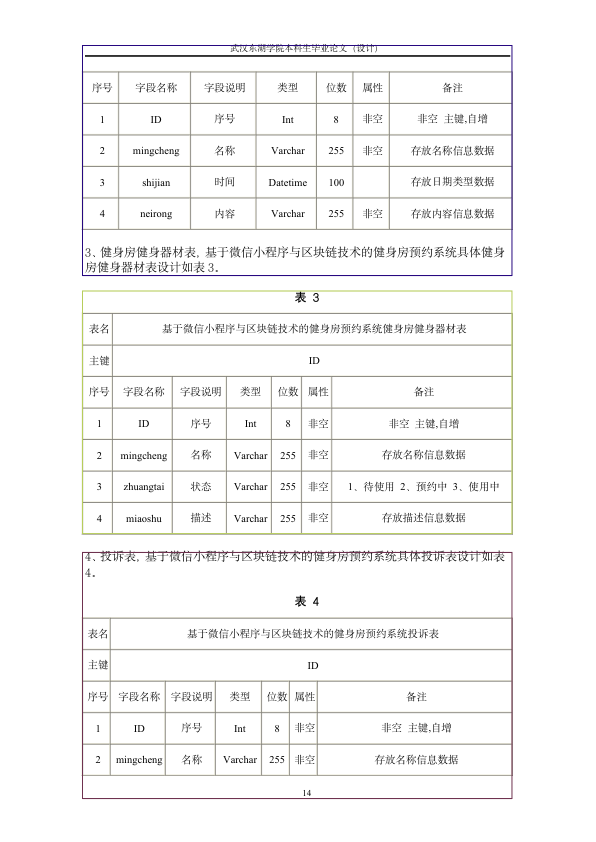

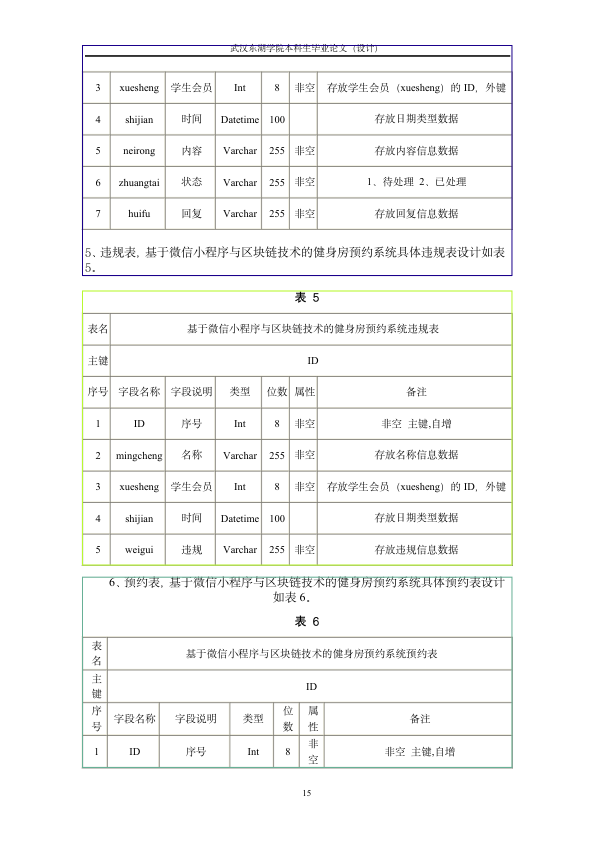

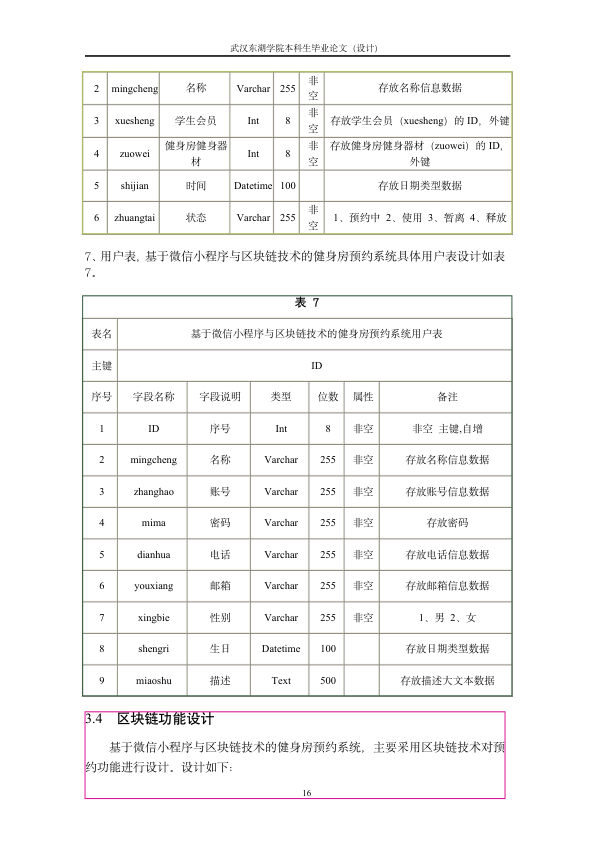

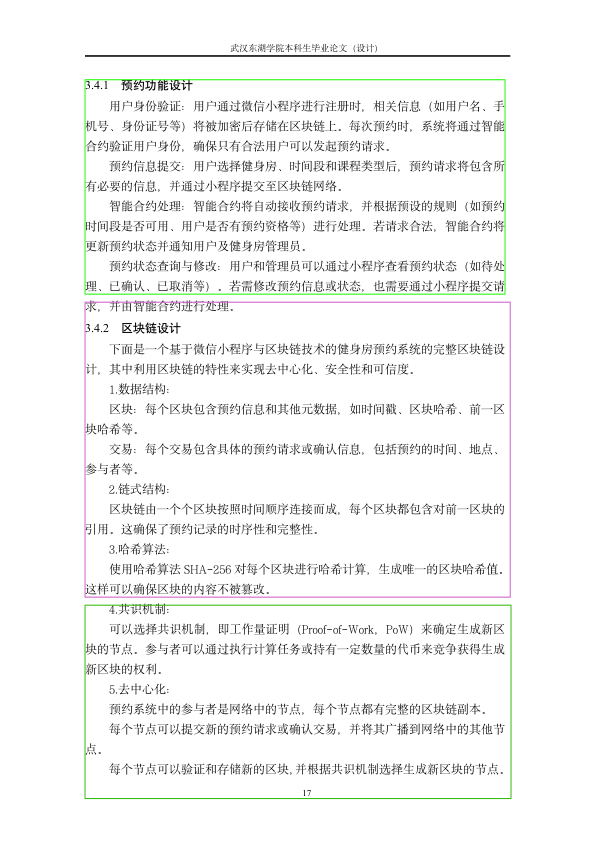

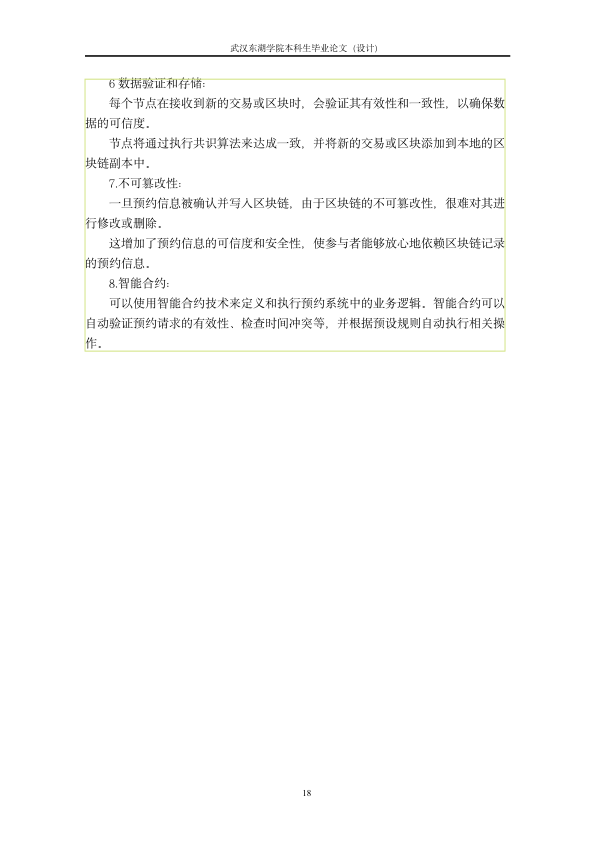

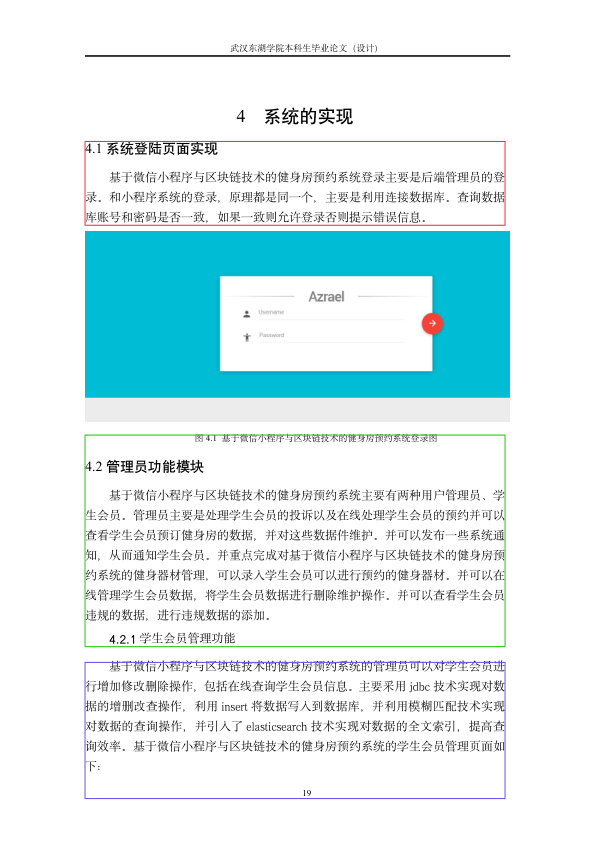

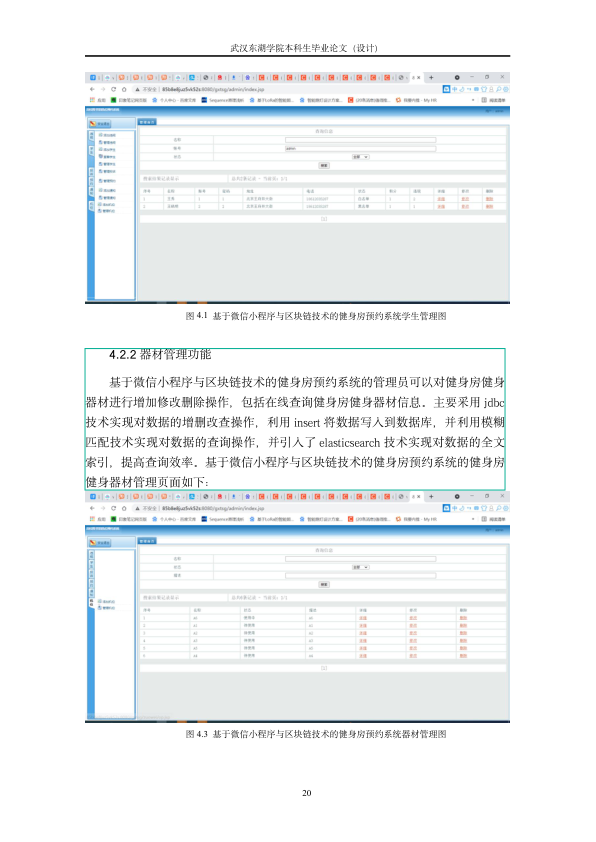

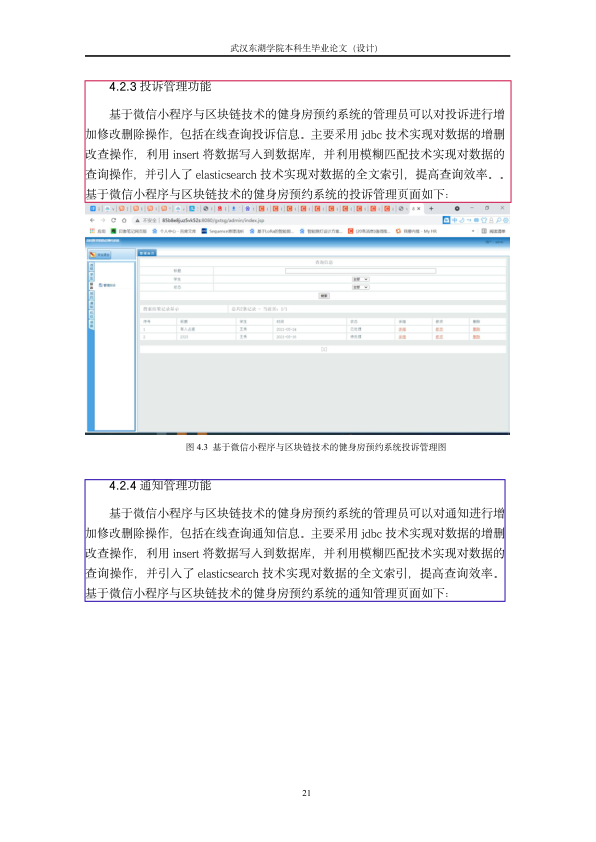

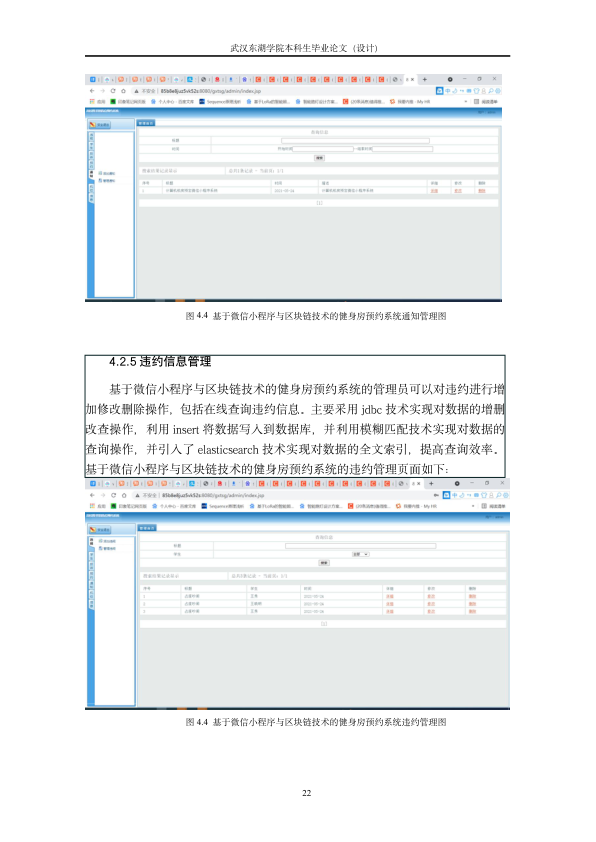

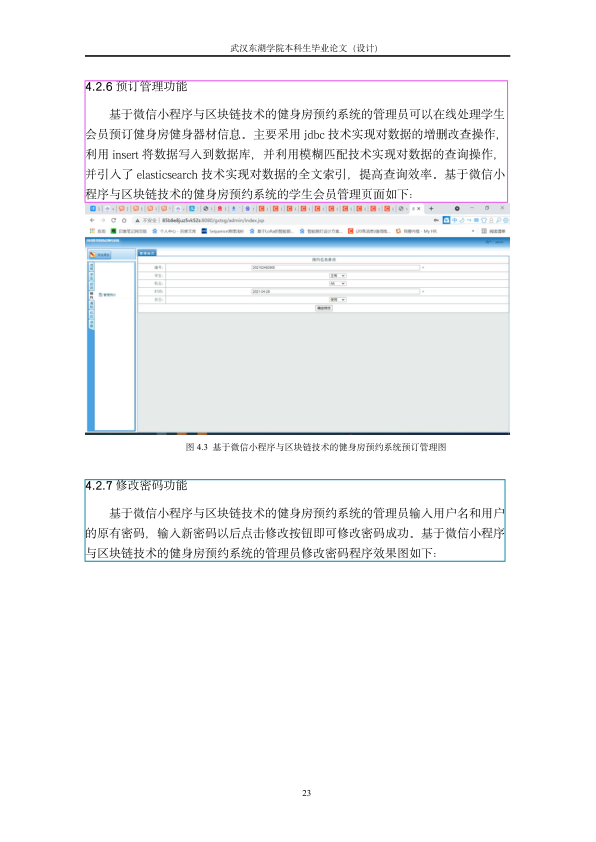

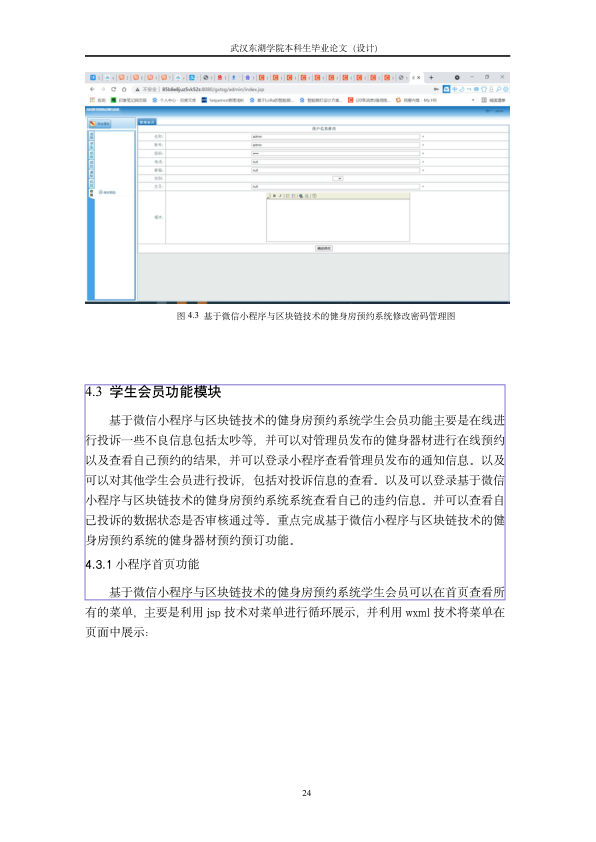

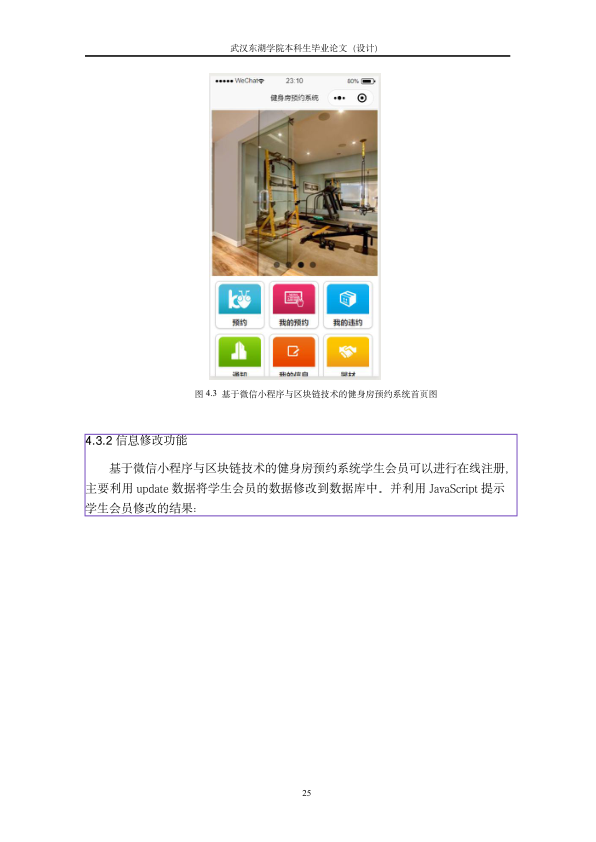

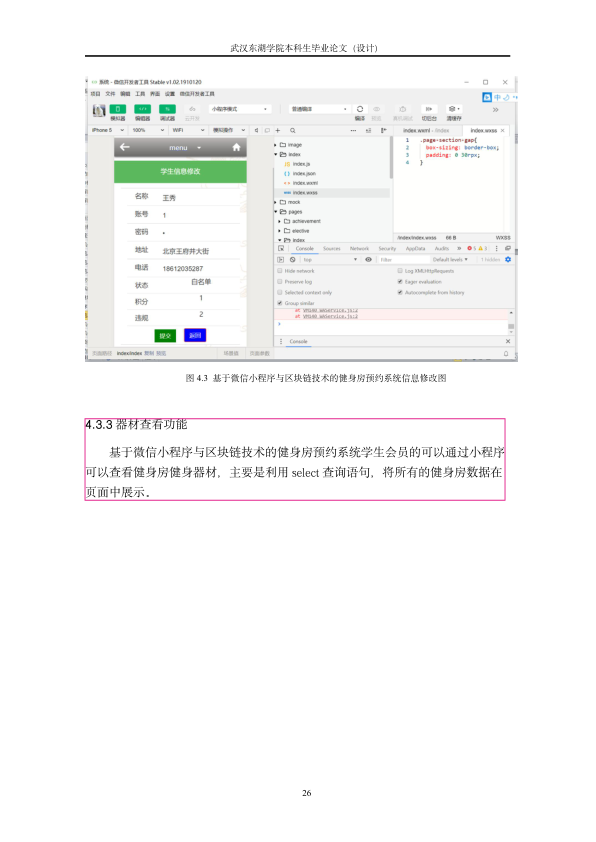

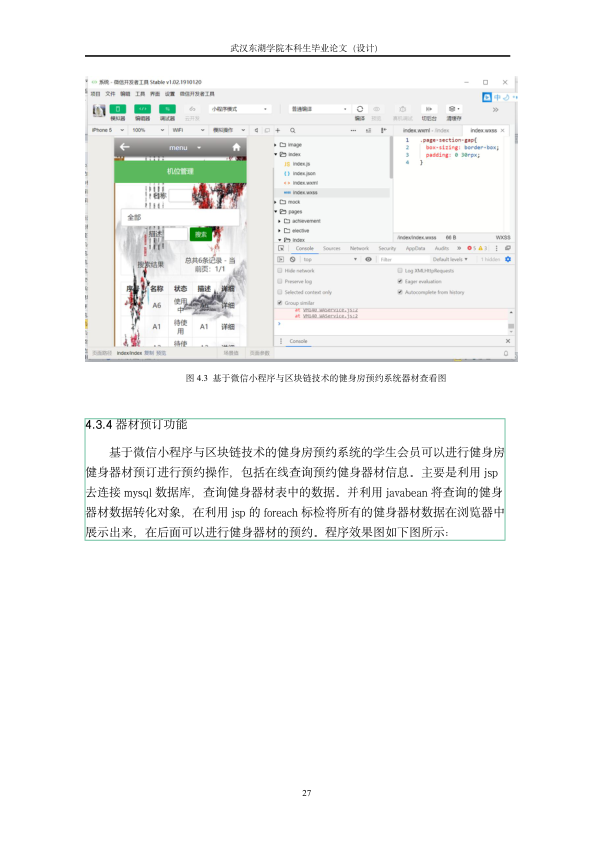

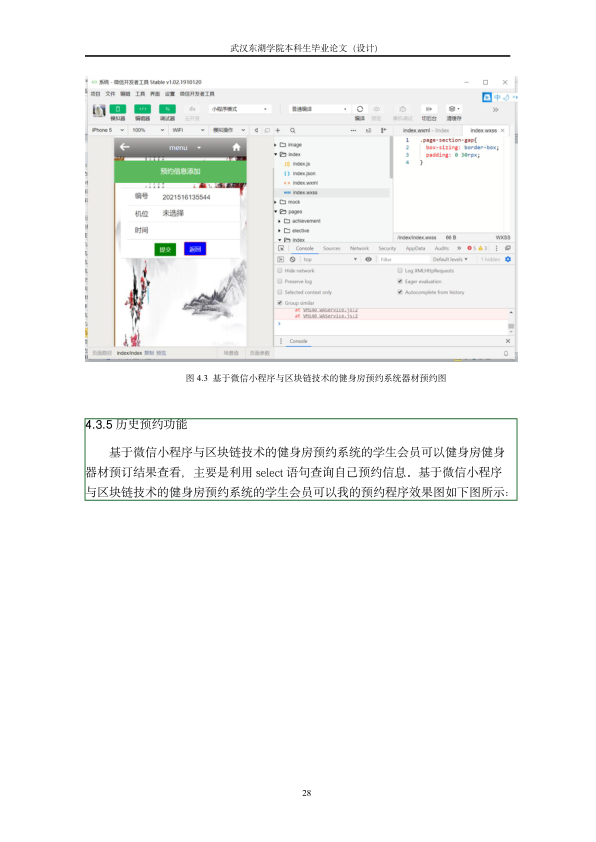

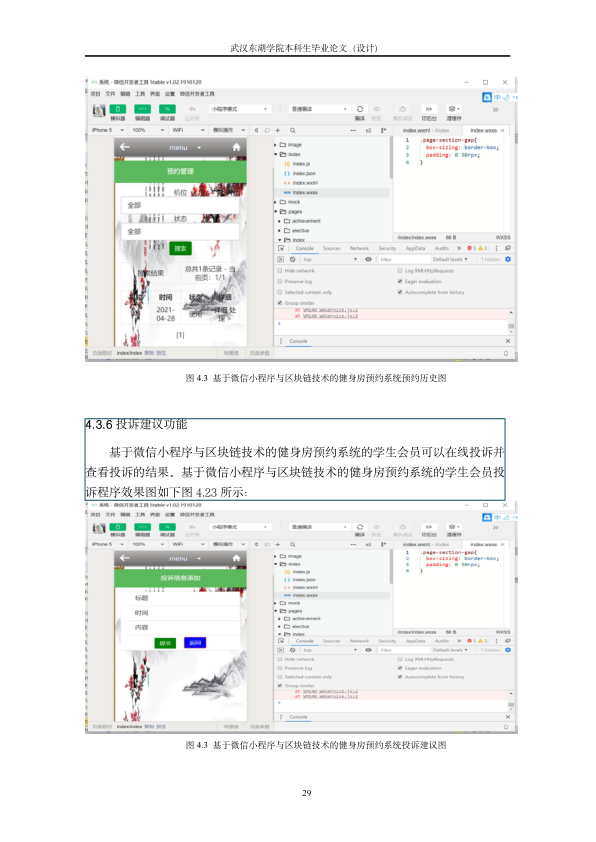

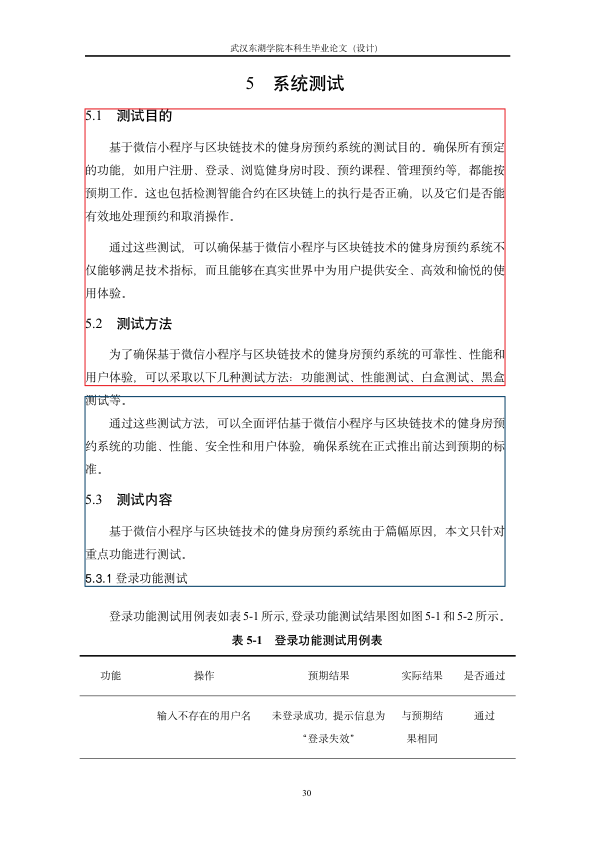

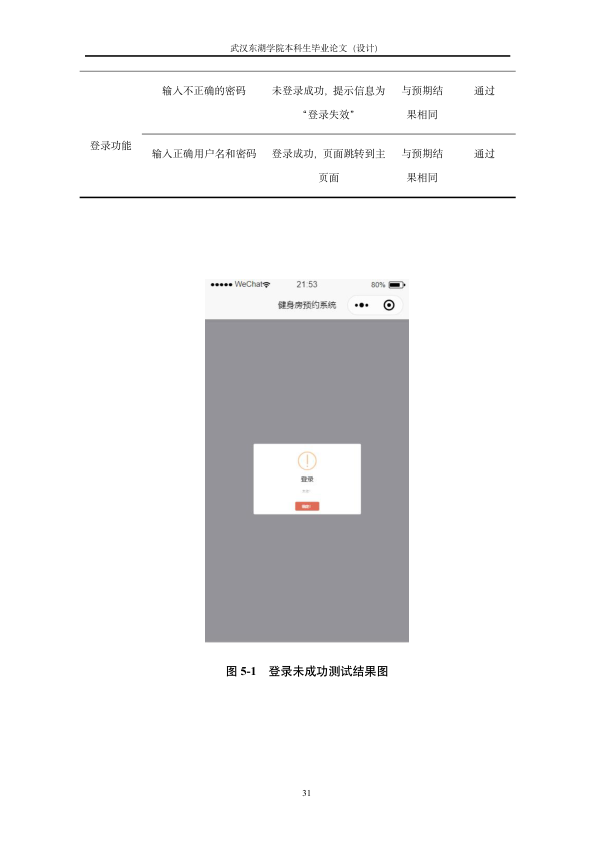

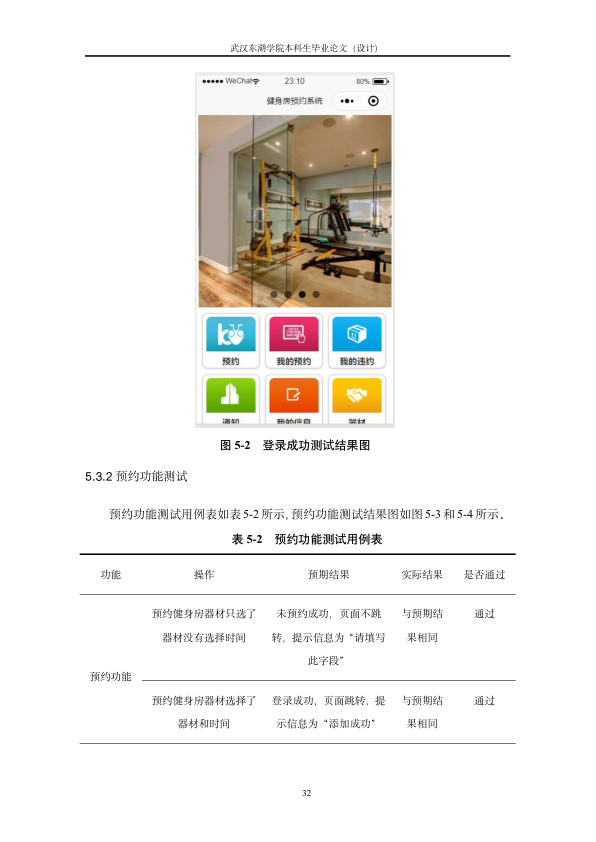

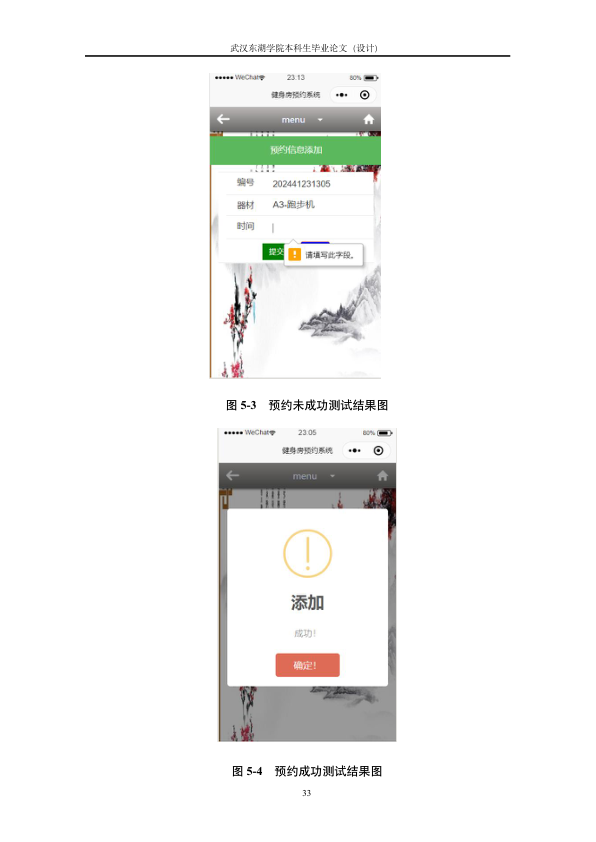

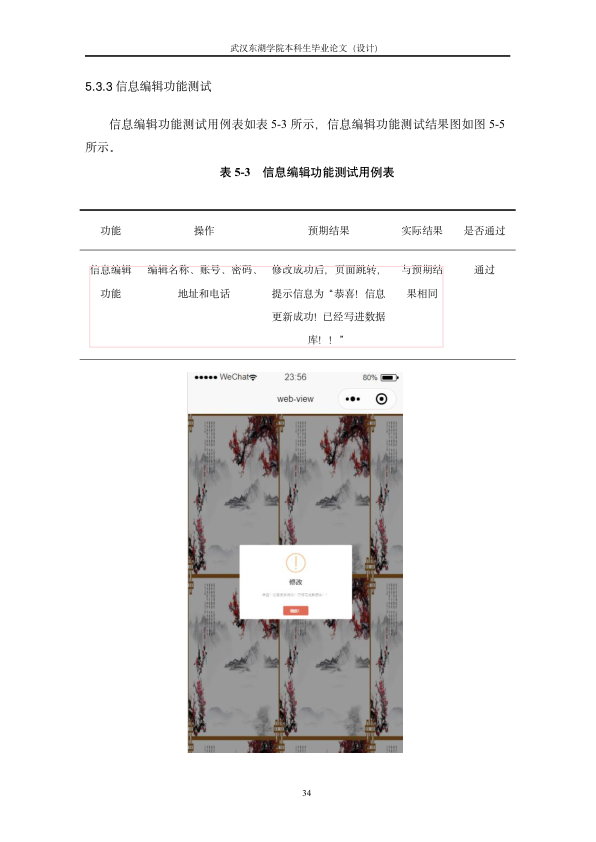

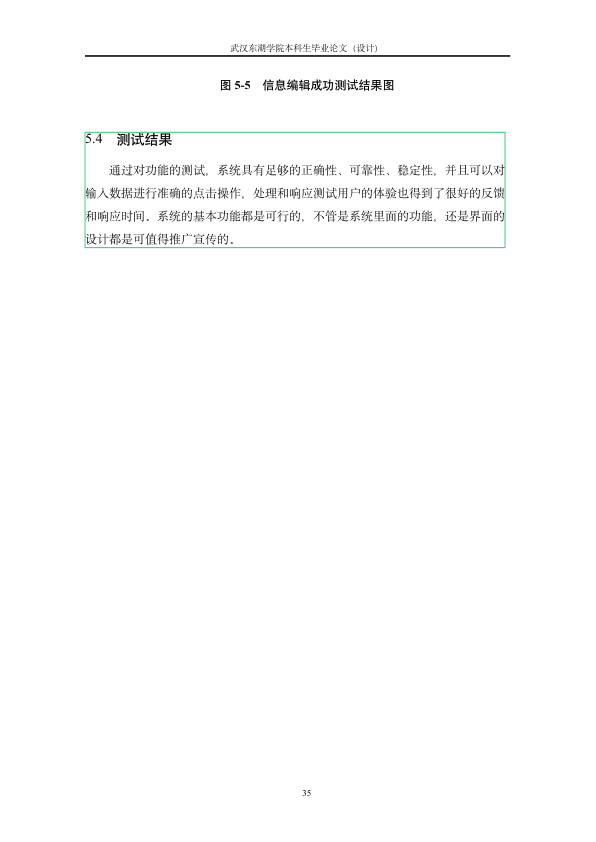

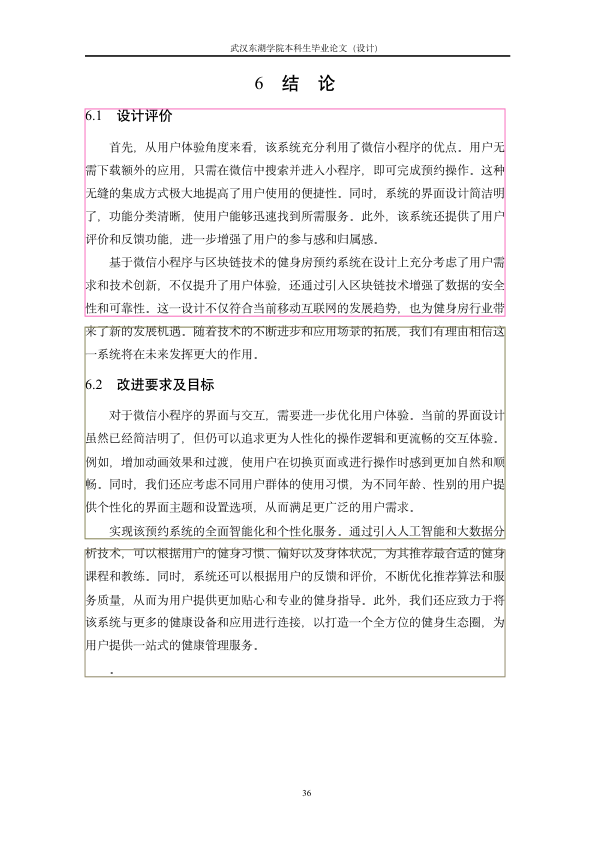

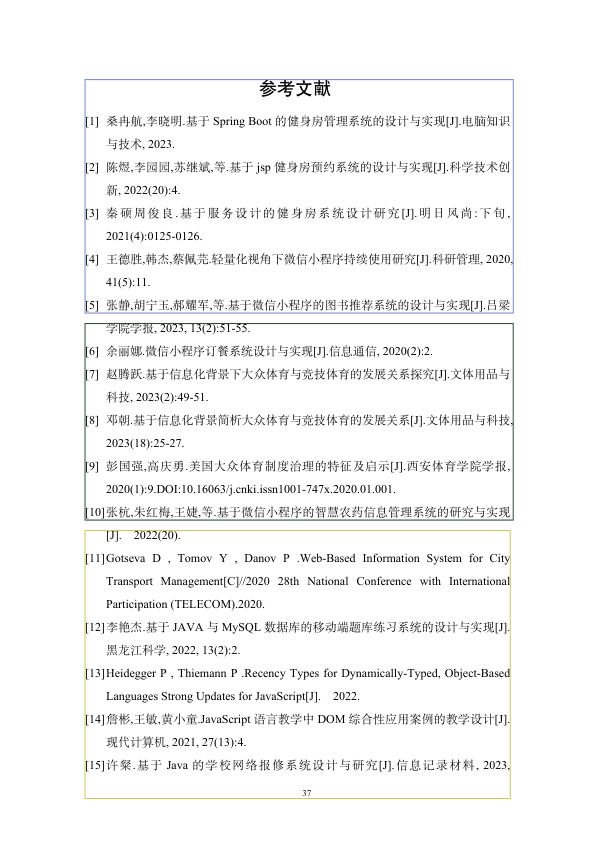

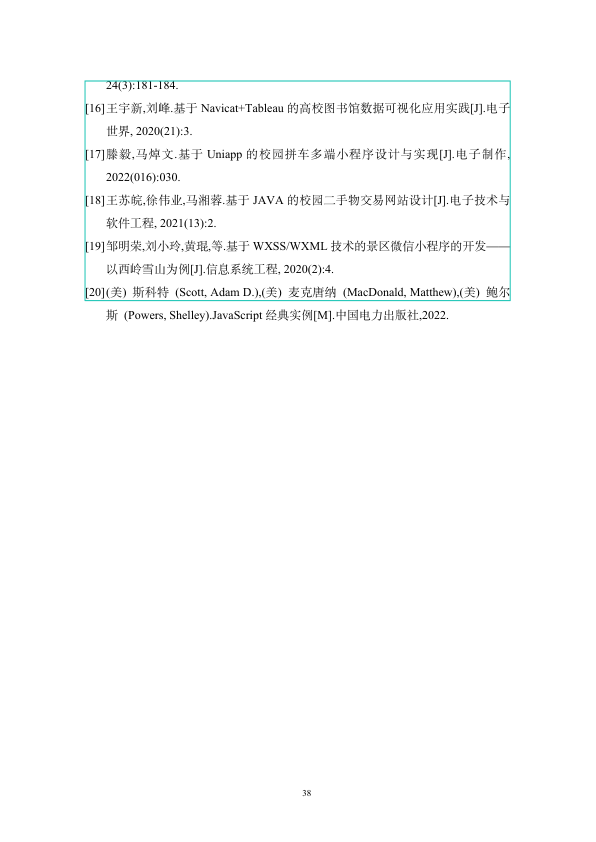

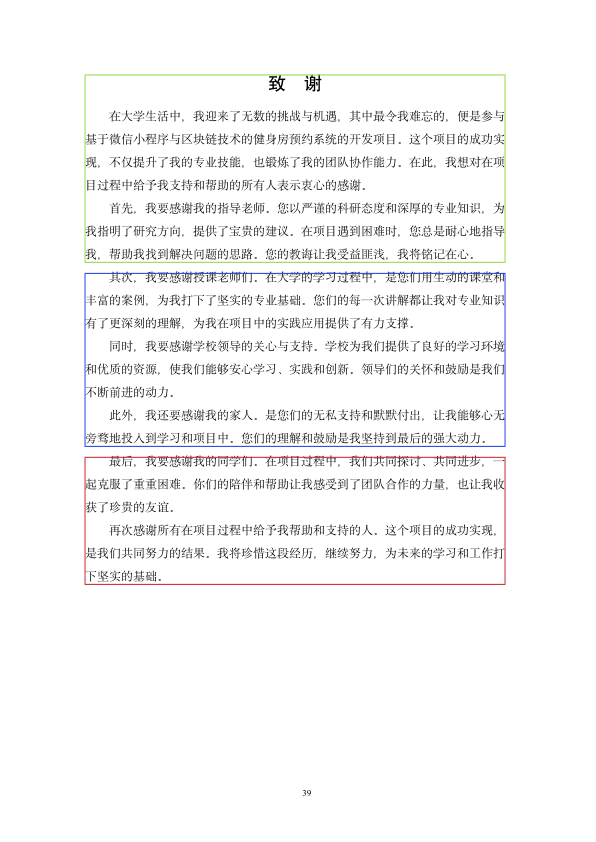

In [47]:
pdf = Pdf(pdf_path)
pdf.display_with_bboxes(
    parsed_pdf.nodes,
)